In [2]:
#
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from PIL import Image
plt.style.use('ggplot')
import folium
from wordcloud import WordCloud, STOPWORDS

## Download dataset by API

In [2]:
!kaggle datasets download -d jboysen/london-crime


  0%|          | 0.00/121M [00:00<?, ?B/s]
  1%|          | 1.00M/121M [00:00<01:02, 2.02MB/s]
  2%|1         | 2.00M/121M [00:00<00:48, 2.57MB/s]
  2%|2         | 3.00M/121M [00:01<00:46, 2.66MB/s]
  3%|3         | 4.00M/121M [00:01<00:39, 3.11MB/s]
  4%|4         | 5.00M/121M [00:01<00:38, 3.14MB/s]
  5%|4         | 6.00M/121M [00:02<00:41, 2.92MB/s]
  6%|5         | 7.00M/121M [00:02<00:38, 3.14MB/s]
  7%|6         | 8.00M/121M [00:02<00:43, 2.74MB/s]
  7%|7         | 9.00M/121M [00:03<00:42, 2.77MB/s]
  8%|8         | 10.0M/121M [00:03<00:42, 2.72MB/s]
  9%|9         | 11.0M/121M [00:04<00:42, 2.71MB/s]
 10%|9         | 12.0M/121M [00:04<00:37, 3.03MB/s]
 11%|#         | 13.0M/121M [00:04<00:35, 3.16MB/s]
 12%|#1        | 14.0M/121M [00:04<00:34, 3.29MB/s]
 12%|#2        | 15.0M/121M [00:05<00:34, 3.27MB/s]
 13%|#3        | 16.0M/121M [00:05<00:35, 3.16MB/s]
 14%|#3        | 17.0M/121M [00:06<00:40, 2.70MB/s]
 15%|#4        | 18.0M/121M [00:06<00:39, 2.72MB/s]
 16%|#5        | 19.

In [11]:
#membaca data
#folder 'london_crime_by_lsoa.csv" dipindah ke file utama supaya bisa kebaca
df = pd.read_csv("london_crime_by_lsoa.csv")

## Data Cleaning 
#### Sebelum melakukan analysis dan membuat chart atau visualisasi dilakukan data cleaning terlebih dahulu 
#### Melakukan Explorasi data sebelum membuat visualisasi

In [12]:
#melihat 5 data teratas
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [13]:
# cek jumlah baris dan kolom
df.shape

(13490604, 7)

##### Data tersebut memiliki 7 kolom dan 13490604 baris

In [14]:
# cek kolom dan tipe datanya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [15]:
#cek berapa jumlah missing value atau null
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [16]:
#membuang kolom 'lsoa_code' karena tidak dibutuhkan
df.drop('lsoa_code', axis=1, inplace=True)

In [17]:
#membuang value yang bernilai '0' karena tidak dibutuhkan
df= df[df.value != 0]
df.head()

,borough,major_category,minor_category,value,year,month
9,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,Hackney,Violence Against the Person,Harassment,1,2013,2
32,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


In [18]:
# karena indexnya tidak berurutan harus direset supaya berurutan
df.reset_index(drop=True, inplace=True)
df.head()

,borough,major_category,minor_category,value,year,month
0,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
2,Ealing,Theft and Handling,Other Theft Person,2,2012,1
3,Hackney,Violence Against the Person,Harassment,1,2013,2
4,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


In [19]:
# melihat jenis isi dari kolom 'year'
df['year'].unique()

array([2016, 2009, 2012, 2013, 2014, 2008, 2015, 2011, 2010], dtype=int64)

In [20]:
# melihat jumlah baris dan kolom
df.shape

(3419099, 6)

###### Setelah dilakukan data cleaning mendapatkan hasil dengan jumlah 6 kolom dan 3419099 baris

## Setelah melakukan data cleansing dilanjutkan untuk membuat visualisasi

## 1. Area Plot

In [21]:
# Melihat data
df

,borough,major_category,minor_category,value,year,month
0,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
2,Ealing,Theft and Handling,Other Theft Person,2,2012,1
3,Hackney,Violence Against the Person,Harassment,1,2013,2
4,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
...,...,...,...,...,...,...
3419094,Bromley,Violence Against the Person,Harassment,3,2009,12
3419095,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
3419096,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
3419097,Lewisham,Violence Against the Person,Common Assault,2,2013,7


In [22]:
# Melihat info kolom dan tippe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3419099 entries, 0 to 3419098
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   borough         object
 1   major_category  object
 2   minor_category  object
 3   value           int64 
 4   year            int64 
 5   month           int64 
dtypes: int64(3), object(3)
memory usage: 156.5+ MB


In [23]:
# Drop kolom yang tidak digunakan untuk melakukan visualisasi
col = ['month', 'major_category', 'minor_category']

#membuat variabel baru bernama top3 untuk membuat visualisasi
area5 = df.drop(col, axis=1)

area5.head()

,borough,value,year
0,Sutton,1,2016
1,Barking and Dagenham,1,2009
2,Ealing,2,2012
3,Hackney,1,2013
4,Bromley,1,2016


In [24]:
#membuat pivot kolom index 'borough' dan kolom 'year'
area5 = pd.pivot_table(df,values=['value'],
                             index=['year'],
                             columns=['borough'],
                             aggfunc=np.sum,fill_value=0)
area5.head()

value                                      \
borough Barking and Dagenham Barnet Bexley  Brent Bromley Camden   
year                                                               
2008                   17656  23944  15305  23504   24015  32010   
2009                   17713  23449  14445  24748   21858  31612   
2010                   17130  23416  13166  25512   19572  31804   
2011                   16686  24007  11325  27669   19868  33956   
2012                   15990  23573  11669  26357   19622  31472   

                                               ...                          \
borough City of London Croydon Ealing Enfield  ... Merton Newham Redbridge   
year                                           ...                           
2008                 0   29516  28947   21980  ...  13875  29752     20873   
2009                 0   29784  28617   21147  ...  13561  28610     20837   
2010                 0   29373  31360   20808  ...  13595  30728     20652   
2011                69   29830  29537   21041  ...  13548  27978     21994   
2012               157   30189  28832   21069  ...  12856  30067     21424   

                                                                            \
borough Richmond upon Thames Southwark Sutton Tower Hamlets Waltham Forest   
year                                                                         
2008                   11106     33470  12943         23578          24080   
2009                   10618     30623  12240         21959          24761   
2010                   10601     31320  12032         23072          24818   
2011                   10896     30723  11068         24712          23714   
2012                   11168     30737  10948         26784          22647   

                                
borough Wandsworth Westminster  
year                            
2008         23330       47846  
2009         23021       48456  
2010         22815       48116  
2011         21384       54243  
2012         24457       59226  

[5 rows x 33 columns]

In [25]:
# Mengambil kolom dengan index 0-5
area5 = area5.iloc[:, :5]
area5

value                             
borough Barking and Dagenham Barnet Bexley  Brent Bromley
year                                                     
2008                   17656  23944  15305  23504   24015
2009                   17713  23449  14445  24748   21858
2010                   17130  23416  13166  25512   19572
2011                   16686  24007  11325  27669   19868
2012                   15990  23573  11669  26357   19622
2013                   15759  22510  11552  23759   18945
2014                   15426  22572  11844  24426   19668
2015                   16346  24036  11990  24883   20637
2016                   16741  24684  12840  26693   20164

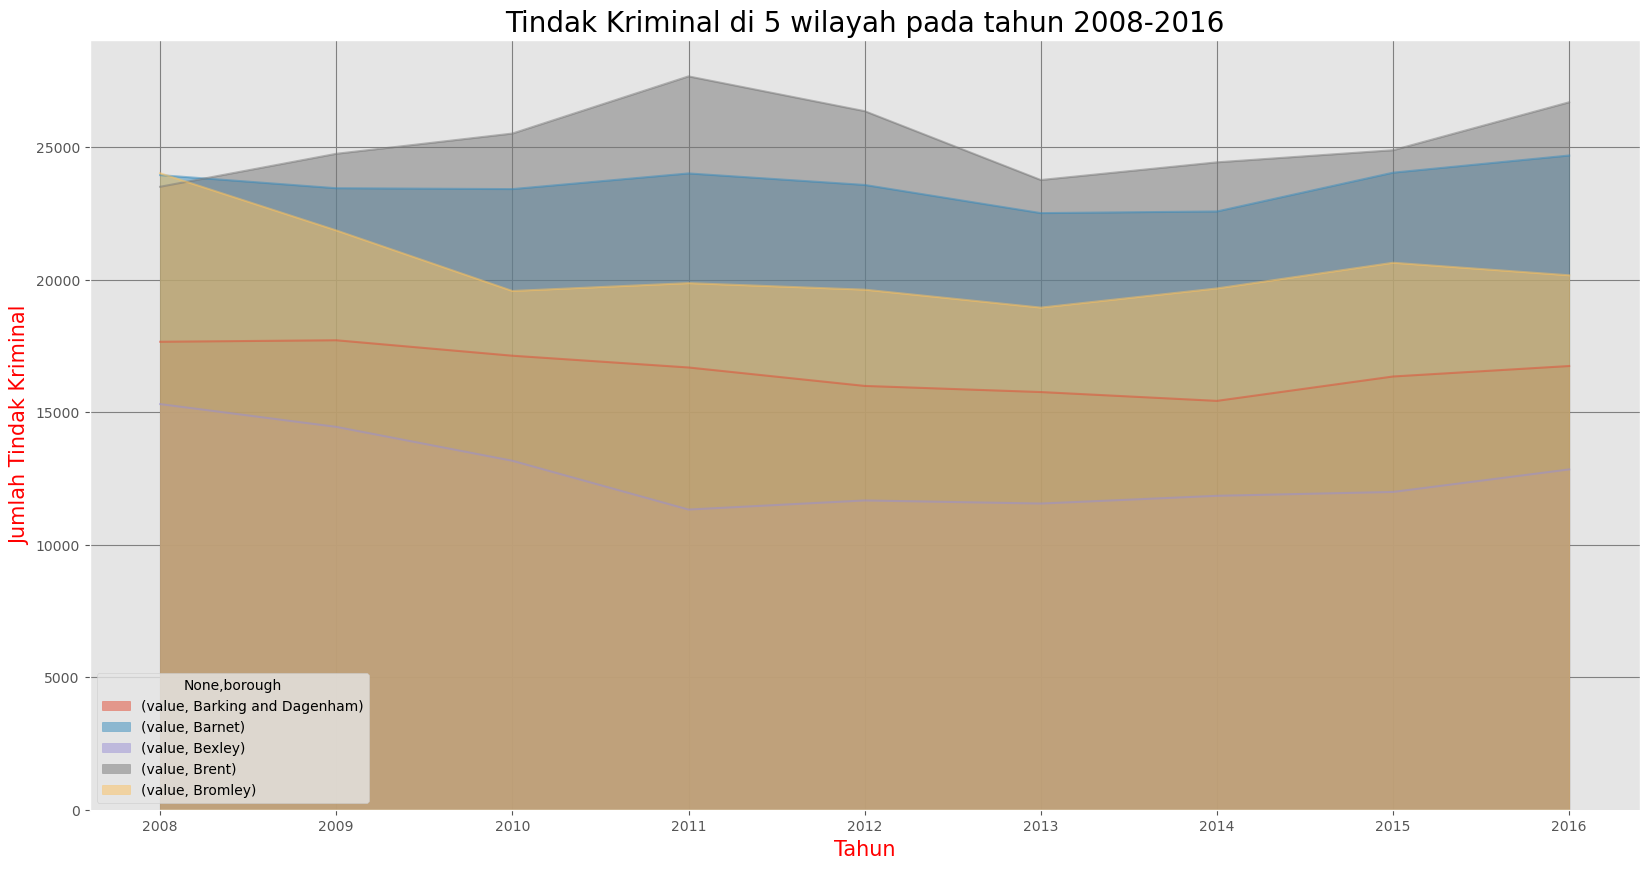

In [27]:
# insiasi bentuk area plot
area5.plot(kind="area",
             figsize=(20,10),
             stacked=False,
             alpha=0.5)

# nama judul area plot
plt.title("Tindak Kriminal di 5 wilayah pada tahun 2008-2016", fontsize=20)
# nama xlabel
plt.xlabel("Tahun", fontsize=15, color= "red")
# nama ylabel
plt.ylabel("Jumlah Tindak Kriminal", fontsize=15, color= "red")
# menampilkan grid
plt.grid(color = "grey")
# print area plot
plt.show()

#### Kesimpulan
- Menurut data diatas wilayah dari 5 wilayah tersebut brent merupakan wilayah dengan tindak kriminal tertinggi
- Menurut data diatas wilayah dari 5 wilayah tersebut bexley merupakan wilayah dengan tindak terendah diantara 5 kota tersebut
- diantara 5 wilayah tersebut, kejadian kejahatan tertinggi berada pada tahun 2011 di wilayah brent

## Bar Chart
### Bagaimana bar chart dari jumlah kejahatan pada setiap kota pada tahun 2008-2016?

In [28]:
# hapus kolom yang tidak diperlukan
kol = ["major_category","minor_category","month","year"]
df_total_crime = df.drop(kol, axis=1)

# total borough
df_total_crime = df_total_crime.groupby("borough").sum()
# tampilkan
df_total_crime

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


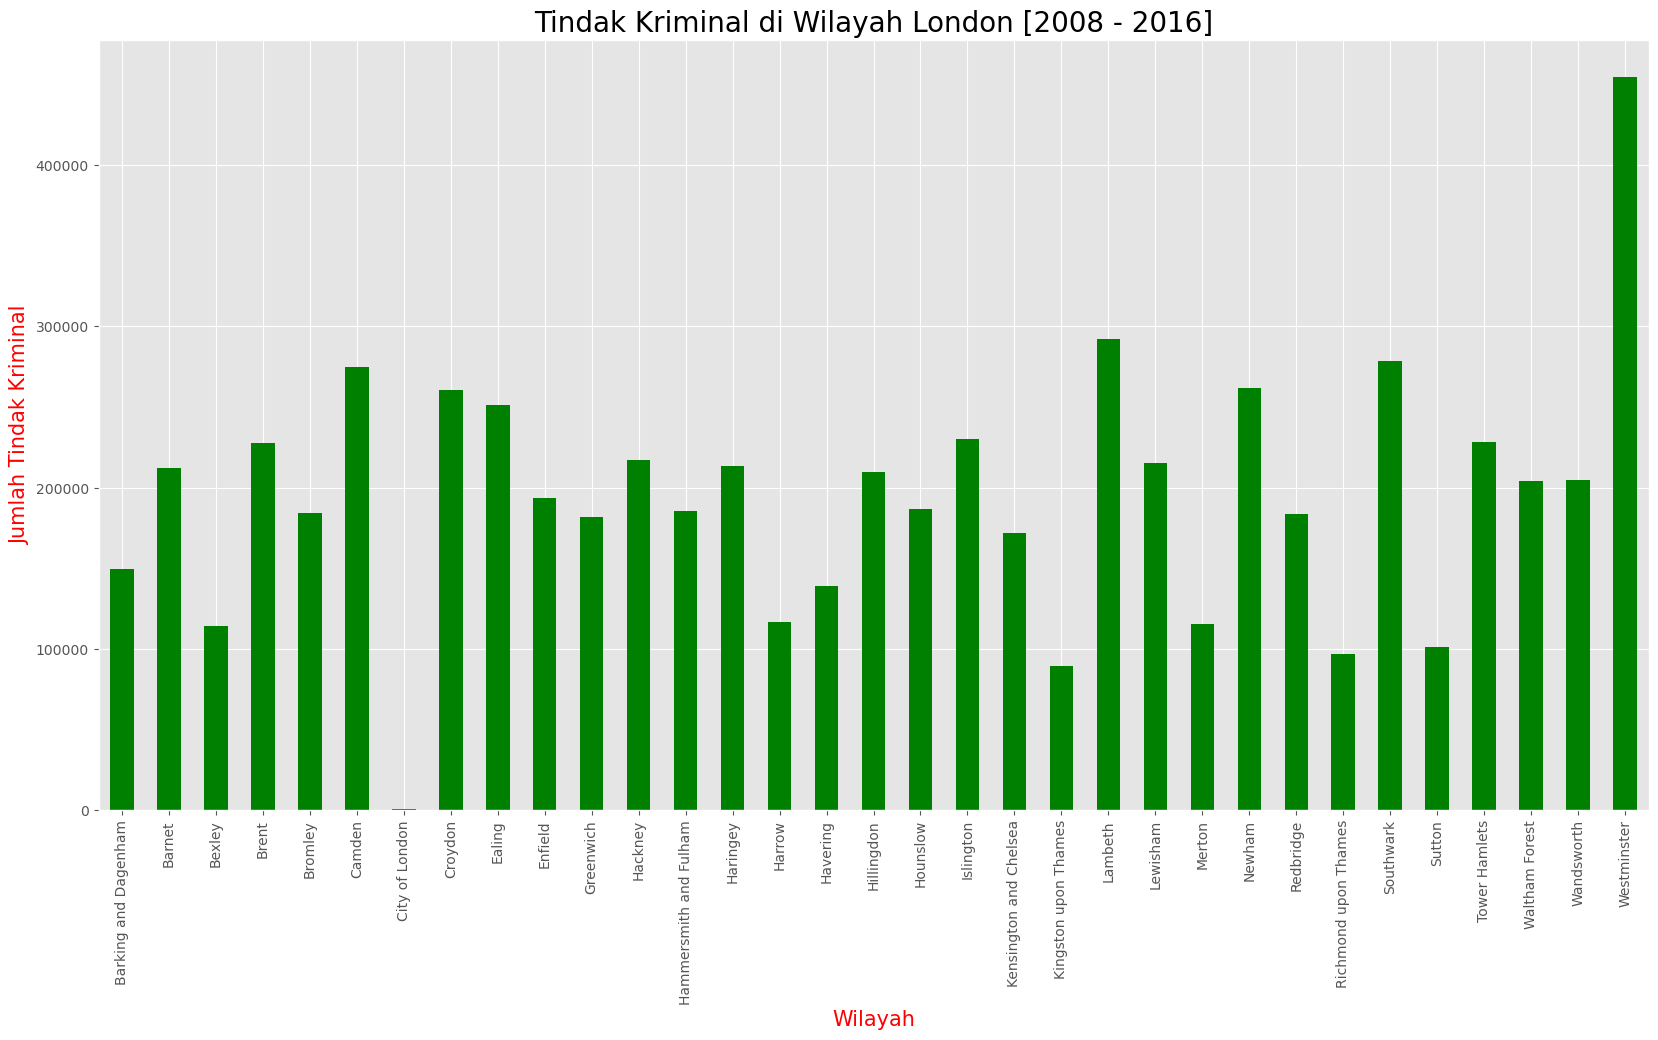

In [30]:
# inisiasi bentuk bar
df_total_crime.plot(kind = 'bar', 
                    figsize=(20,10), 
                    color='green',
                    legend = False)

# nama judul bar chart
plt.title('Tindak Kriminal di Wilayah London [2008 - 2016]', fontsize = 20)
# nama xlabel
plt.xlabel('Wilayah', fontsize = 15, color = "red")
# nama ylabel
plt.ylabel('Jumlah Tindak Kriminal', fontsize = 15, color = "red")

# print bar chart
plt.show()

Hasil Bar Diatas Dapat Disimpulkan bahwa :
- area yang memiliki kejahatan terendah adalah city of london
- area yang memiliki kejahatan tertinggi adalah westermister

## Pie Chart
#### Pie chart merupakan salah satu cara membuat visualisasi berbentuk pie yang terdiri dari irisan irisan
#### Pertanyaan : Bagaimana visualisasi chart pie pada daerah barnet dari tahun 2008-2016?

In [31]:
#area5 merupakan variabel yang sudah dibuat mengenai 5 area pada tahun 2008-2016
area5

value                             
borough Barking and Dagenham Barnet Bexley  Brent Bromley
year                                                     
2008                   17656  23944  15305  23504   24015
2009                   17713  23449  14445  24748   21858
2010                   17130  23416  13166  25512   19572
2011                   16686  24007  11325  27669   19868
2012                   15990  23573  11669  26357   19622
2013                   15759  22510  11552  23759   18945
2014                   15426  22572  11844  24426   19668
2015                   16346  24036  11990  24883   20637
2016                   16741  24684  12840  26693   20164

In [35]:
#membuat nama variabel baru "year_pie" pada wilayah barnet dan membuang wilayah lain selain barnet
year_pie_barnet = area5.iloc[:, 1:2]
year_pie_barnet

,value
borough,Barnet
year,
2008,23944
2009,23449
2010,23416
2011,24007
2012,23573
2013,22510
2014,22572
2015,24036


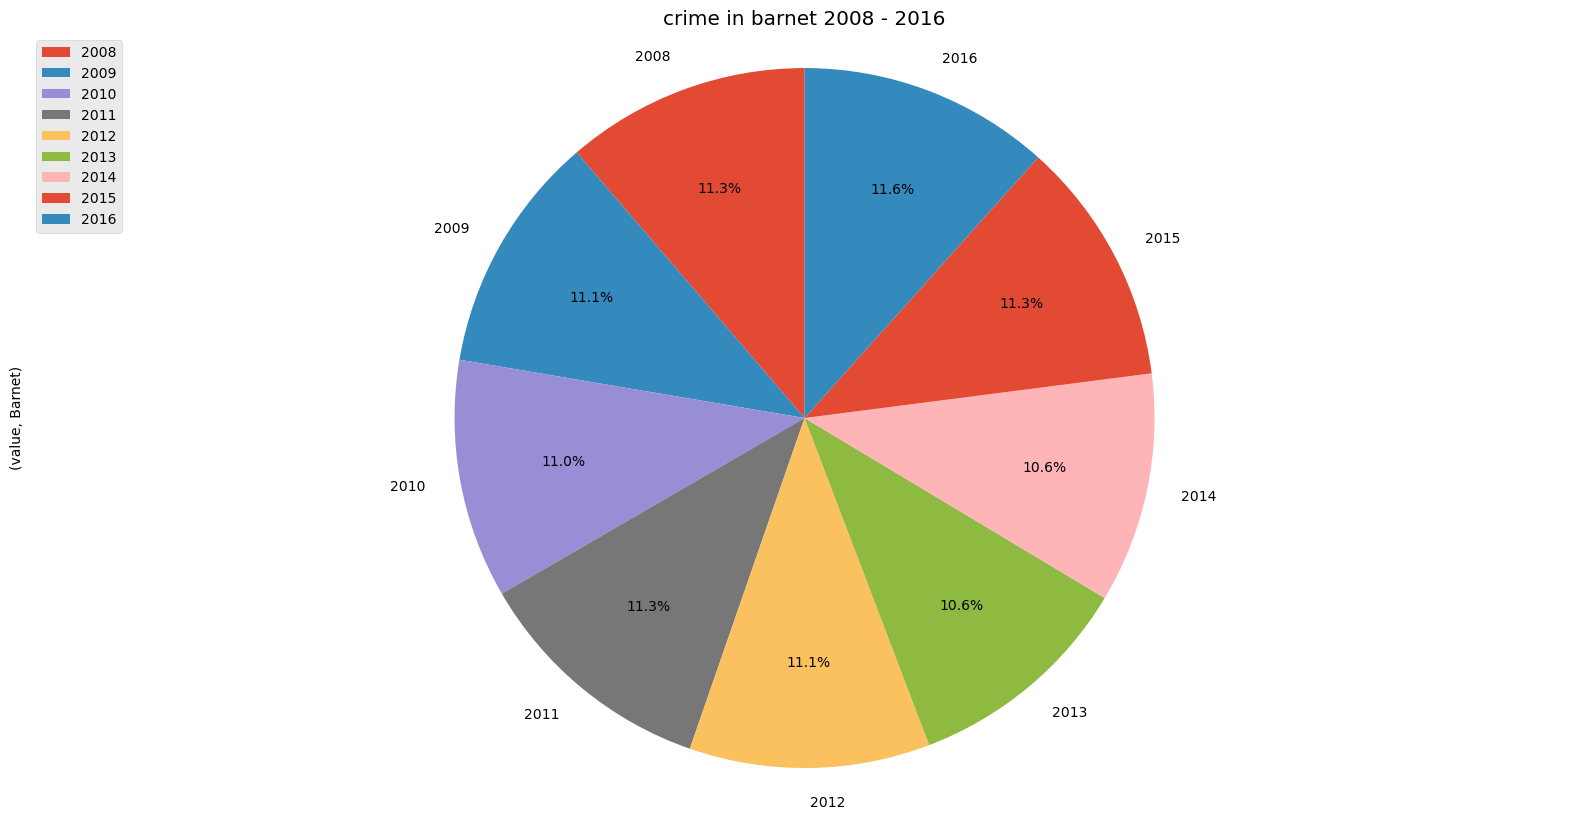

In [37]:
# inisiasi bentuk pie chart
explode_list = [0, 0, 0, 0, 0,0 ,0 ,0 ,0]
year_pie_barnet.plot(
    kind="pie",
    figsize=(20,10),
    autopct='%1.1f%%',
    startangle=90,
    label=None,
    pctdistance=0.7,
    rot = 45,
    subplots = True,
    explode=explode_list)

# judul pie chart
plt.title('crime in barnet 2008 - 2016')

plt.axis('equal')
# tabel keterangan pie chart
plt.legend(labels=year_pie_barnet.index, loc='upper left')
# print pie chart
plt.show()

##### Berdasarkan hasil diatas dapat disimpulkan mengenai tindak kejahatan di barnet mulai dari th 2008-2016 dengan presentase sebagai berikut
- Pada 2008 presentase kejahatan sebesar 11.3%
- Pada 2009 presentase kejahatan sebesar 11.1%
- Pada 2010 presentase kejahatan sebesar 11%
- Pada 2011 presentase kejahatan sebesar 11.3%
- Pada 2012 presentase kejahatan sebesar 11.1%
- Pada 2013 presentase kejahatan sebesar 10.6%
- Pada 2014 presentase kejahatan sebesar 10.6%
- Pada 2015 presentase kejahatan sebesar  11.3%
- Pada 2016 presentase kejahatan sebesar 11.6%



## Histogram
Histogram adalah sebuah visualisasi untuk menampilkan data numerik secara freqwensi
Pertanyaan : Berapa jumlah kota dan jumlah kejahatan yang ada dari tahun 2008-2016?

In [38]:
df.head()

,borough,major_category,minor_category,value,year,month
0,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
2,Ealing,Theft and Handling,Other Theft Person,2,2012,1
3,Hackney,Violence Against the Person,Harassment,1,2013,2
4,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


In [39]:
#hapus kolom yang tidak digunakan
kol = ["major_category","minor_category","month","year"]
df_total_crime = df.drop(kol, axis=1)

# sum data value kejahatan
df_total_crime = df_total_crime.groupby("borough").sum()

df_total_crime.head()

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349


Hasil diatas merupakan hasil dari jumlah kejahatan pada setiap kota dari th 2008-2016

In [41]:
# numpy
# membuat sumbu menjadi beberapa bin
count, bin_edges = np.histogram(df_total_crime)

print(count)
print(bin_edges)

[ 1  1  5  4 13  5  3  0  0  1]
[   780.   46204.8  91629.6 137054.4 182479.2 227904.  273328.8 318753.6
 364178.4 409603.2 455028. ]


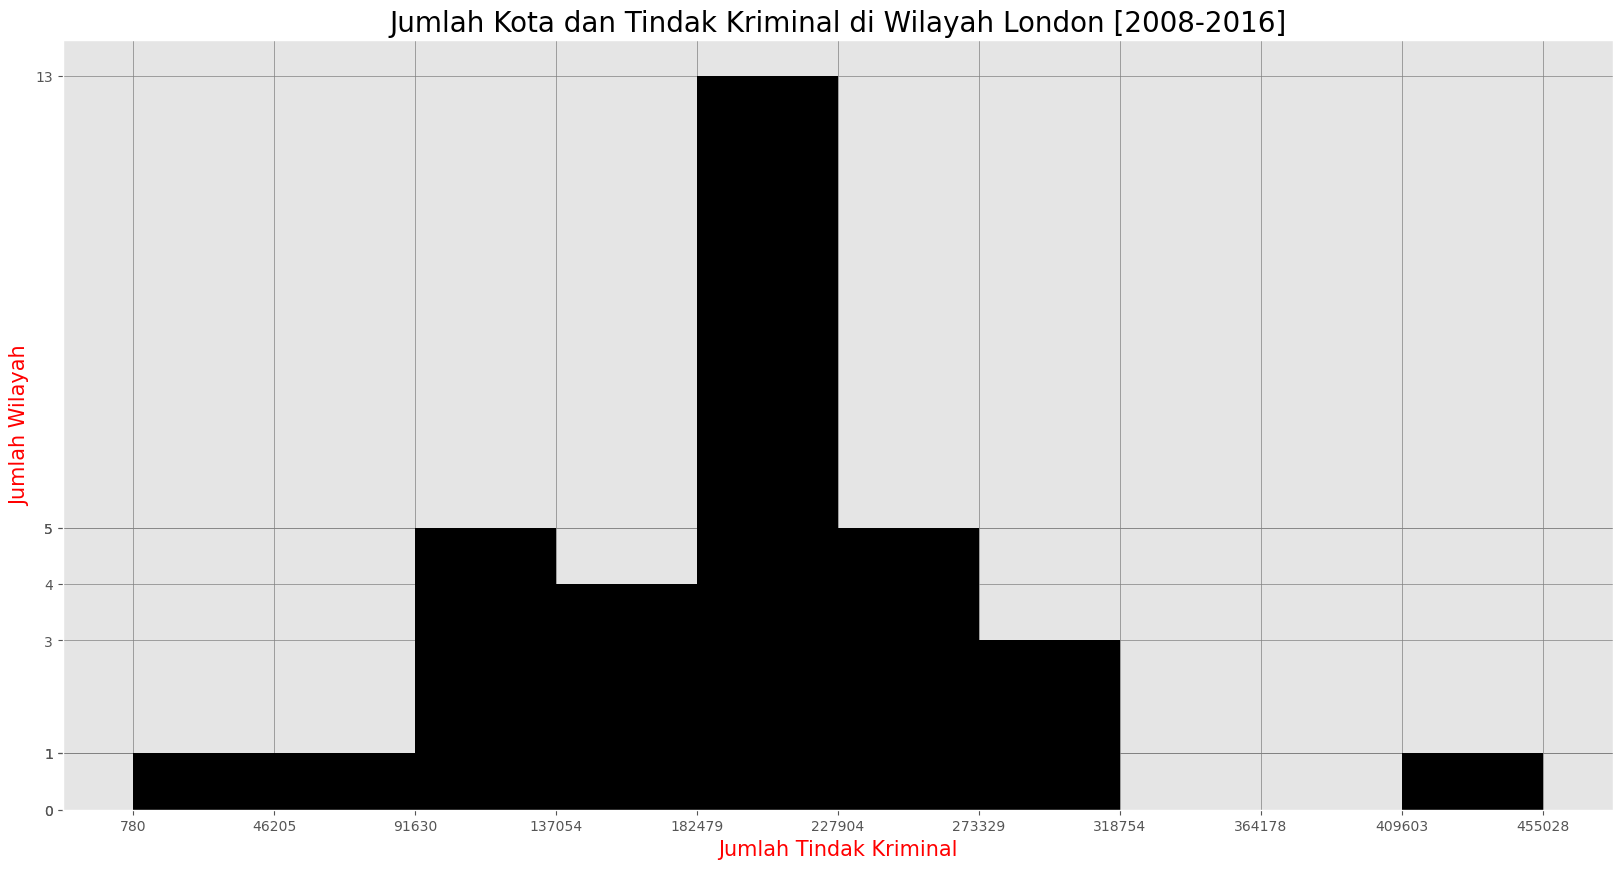

In [42]:
# inisiasi bentuk size, warna histogram
df_total_crime.plot(kind="hist",
             figsize=(20,10),
             xticks=bin_edges,
             yticks=count,
             legend = False,
             color="black")
# nama judul histogram
plt.title("Jumlah Kota dan Tindak Kriminal di Wilayah London [2008-2016]", fontsize=20)
# nama xlabel
plt.xlabel("Jumlah Tindak Kriminal", fontsize=15, color = "red")
# nama ylabel
plt.ylabel("Jumlah Wilayah", fontsize=15, color = "red")
# membuat grid
plt.grid(color="grey", linewidth=0.5)
# print histogram
plt.show()

Berdasarkan data histogram diatas dapat disimpulkan sebagai berikut :
1. 1 Wilayah memiliki tindak kriminal diantara range 780-462051. 
2. 1 Wilayah memiliki tindak kriminal diantara range 46205-91630
3. Terdapat 5 wilayah yang memiliki jumlah tindak kriminal diantara range 91630-137054
4. Terdapat 4 wilayah yang memiliki jumlah tindak kriminal diantara range 137054-182479
5. Terdapat 13 wilayah yang memiliki jumlah tindak kriminal diantara range 182479-227904
6. Terdapat 5 wilayah yang memiliki jumlah kriminal diantara range 227904-273329
7. Terdapat 3 wilayah yang memiliki jumlah tindak kriminal dengan range 273329-318754
8. Terdapat 1 wilayah dengan range kejahatan 4009603-455028

## Box Plot
box plot adalahl sebuah metode merepresentasikan distribusi data dengan 5 dimensi utama sebagai berikut:
- minimum
- first kuartil
- second kuartil (median)
- third kuartil
- maksimum

### Pertanyaan : Bagaimana distribusi data tindak kriminal di wilayah barnet pada 2008-2016?

In [43]:
df.head()

,borough,major_category,minor_category,value,year,month
0,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
2,Ealing,Theft and Handling,Other Theft Person,2,2012,1
3,Hackney,Violence Against the Person,Harassment,1,2013,2
4,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4


In [44]:
#hapus kolom yang tidak dibutuhkan
col_del = ["major_category","minor_category","month","year"]

In [45]:
year_pie_barnet

,value
borough,Barnet
year,
2008,23944
2009,23449
2010,23416
2011,24007
2012,23573
2013,22510
2014,22572
2015,24036


In [46]:
year_pie_barnet.describe()

,value
borough,Barnet
count,9.000000
mean,23576.777778
std,702.366852
min,22510.000000
25%,23416.000000
50%,23573.000000
75%,24007.000000
max,24684.000000


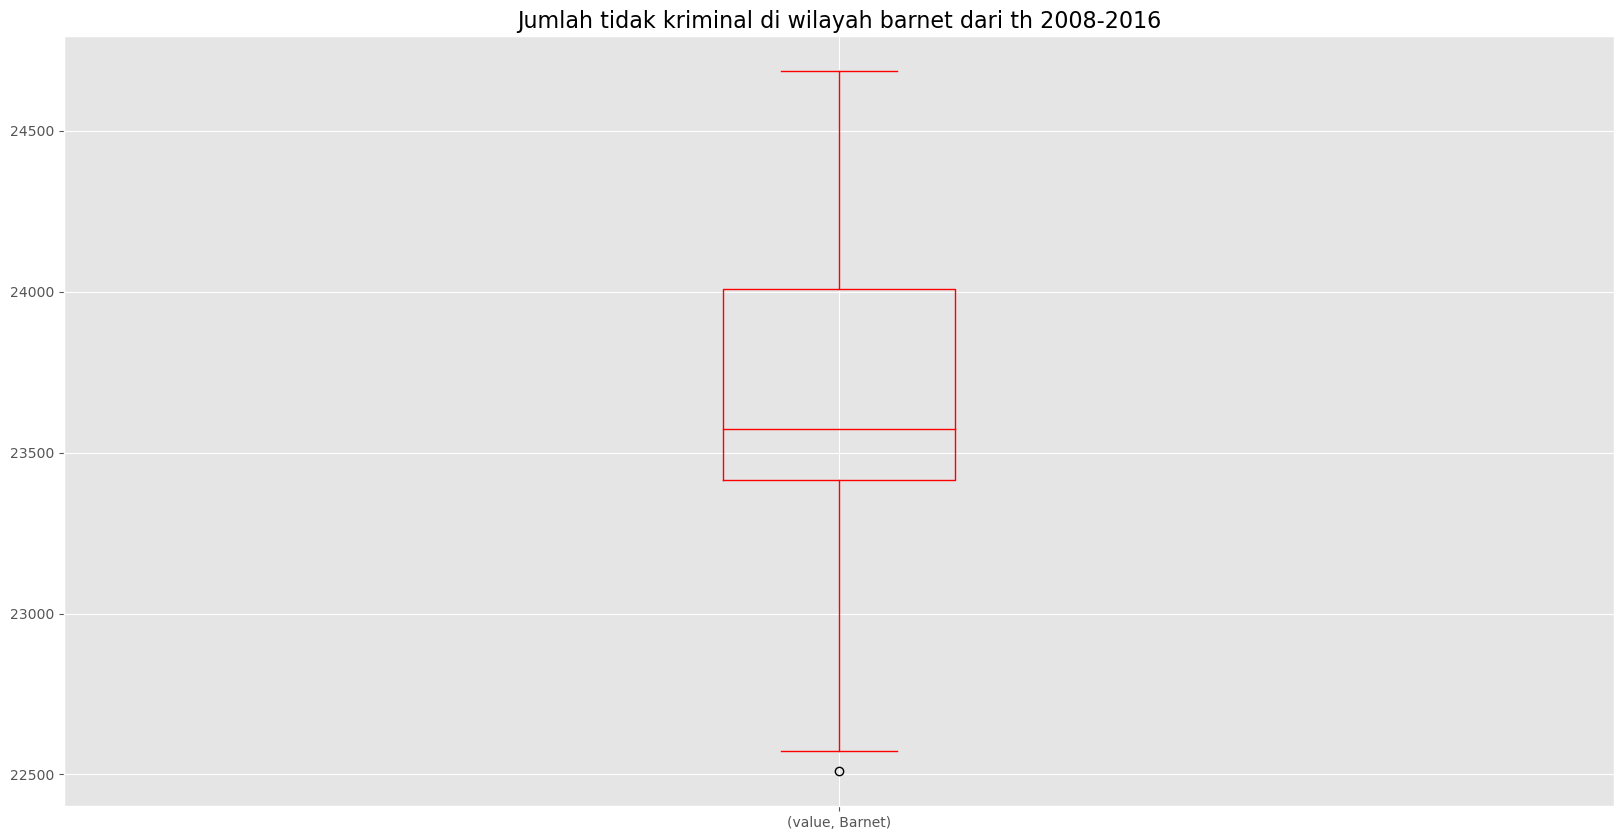

In [47]:
# inisiasi box plot
year_pie_barnet.plot(kind="box",
                figsize=(20,10),
                color = "red"
                )

# membuat nama judul box plot
plt.title("Jumlah tidak kriminal di wilayah barnet dari th 2008-2016", fontsize=16)

#menampilkan box plot
plt.show()

Hasi dari Box Plot dapat disimpulkan mengenai jumlah tindak  kriminal di wilayah barnet mulai dari th 2008-2016 sebagai berikut
- minimum :  22510
- first kuartil : 23416
- second kuartil (median) :  23573
- third kuartil : 24007
- maksimum : 24684

## Scatter Plot
Scatter plot merupakan metode untuk membandingkan variabel satu dengan yang lainnya

### Pertanyaan : Bagaimana trend kejadian tindak kriminal dari 2008-2016 di london

In [57]:
# menghapus kolom yang tidak diperlukan
kol4 = ["borough","major_category","minor_category"]
df_year = df.drop(kol4, axis=1)
# print df_year
df_year

,value,year,month
0,1,2016,8
1,1,2009,5
2,2,2012,1
3,1,2013,2
4,1,2016,4
...,...,...,...
3419094,3,2009,12
3419095,1,2015,10
3419096,1,2012,4
3419097,2,2013,7


In [58]:
# reset indexd dan drop bulan
df_year = df_year.reset_index().drop("month", axis=1)
# group by year + sum value
df_year = df_year.groupby("year").sum()

df_year = df_year.reset_index()

df_year

,year,index,value
0,2008,667961014182,738641
1,2009,654394262353,717214
2,2010,647529898733,715324
3,2011,648056051682,724915
4,2012,646328390125,737329
5,2013,624179786267,686407
6,2014,632951253866,680183
7,2015,653261997113,711624
8,2016,670454622030,736121


In [59]:
# drop index krn tidak digunakan
df_year = df_year.drop('index', axis=1)

In [191]:
# cek tipe data
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    9 non-null      int64
 1   value   9 non-null      int64
dtypes: int64(2)
memory usage: 272.0 bytes


In [60]:
# print df_year
df_year

,year,value
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


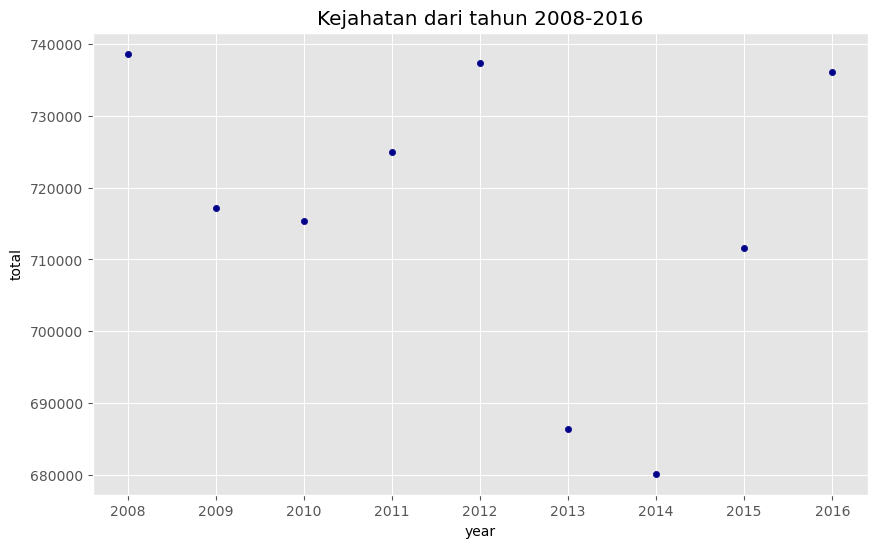

In [61]:
# inisiasi scatter plot 
df_year.plot(kind='scatter', x='year', y='value', figsize=(10, 6), color='darkblue')

# judul scatter plot
plt.title("Kejahatan dari tahun 2008-2016")
# judul xlabel
plt.xlabel('year')
#judul ylabel
plt.ylabel('total')
#print plot
plt.show()

Dari hasil diatas bisa disimpulkan sebagai berikut :
- tahun 2008 merupakan kejadian kejahatan tertinggi
- tahun 2014 merupakan kejahatan terendah
- penurunan kejahatan paling tajam terjadi di tahun 2012 ke 2013


## Wordcloud

In [62]:
# memilih kolom yang digunakan dalam data frame 
df_minor = pd.DataFrame(df, columns = ['borough', 'minor_category','year','value'])
df_minor.head()

,borough,minor_category,year,value
0,Sutton,Theft/Taking of Pedal Cycle,2016,1
1,Barking and Dagenham,Other Theft Person,2009,1
2,Ealing,Other Theft Person,2012,2
3,Hackney,Harassment,2013,1
4,Bromley,Criminal Damage To Motor Vehicle,2016,1


In [63]:
#group by borough dan value berdasarkan sum
df_minor_sum =df_minor[['borough', 'value']].groupby(['borough'], as_index= True).sum()
df_minor_sum.head()

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349


In [16]:
# menghitung nilai value dengan variabel total crime
totalcrime =df_minor_sum['value'].sum()
totalcrime

6447758

In [24]:
# inisiasi wordcloud
max_words = 100
word_string = ''
for borough in df_minor_sum.index.values:
    # memeriksa apakah nama negara adalah nama satu kata
    if len(borough.split(' ')) == 1:
        repeat_num_times = int(df_minor_sum.loc[borough,'value']/float(totalcrime)*max_words)
        word_string = word_string + ((borough + ' ') * repeat_num_times)
                                     
# menampilkan teks yang dihasilkan
word_string


'Barnet Barnet Barnet Bexley Brent Brent Brent Bromley Bromley Camden Camden Camden Camden Croydon Croydon Croydon Croydon Ealing Ealing Ealing Enfield Enfield Enfield Greenwich Greenwich Hackney Hackney Hackney Haringey Haringey Haringey Harrow Havering Havering Hillingdon Hillingdon Hillingdon Hounslow Hounslow Islington Islington Islington Lambeth Lambeth Lambeth Lambeth Lewisham Lewisham Lewisham Merton Newham Newham Newham Newham Redbridge Redbridge Southwark Southwark Southwark Southwark Sutton Wandsworth Wandsworth Wandsworth Westminster Westminster Westminster Westminster Westminster Westminster Westminster '

In [27]:
# membuat wordcloud
wordcloud = WordCloud(background_color='black').generate(word_string)
print('word berhasil terbuat')

word berhasil terbuat


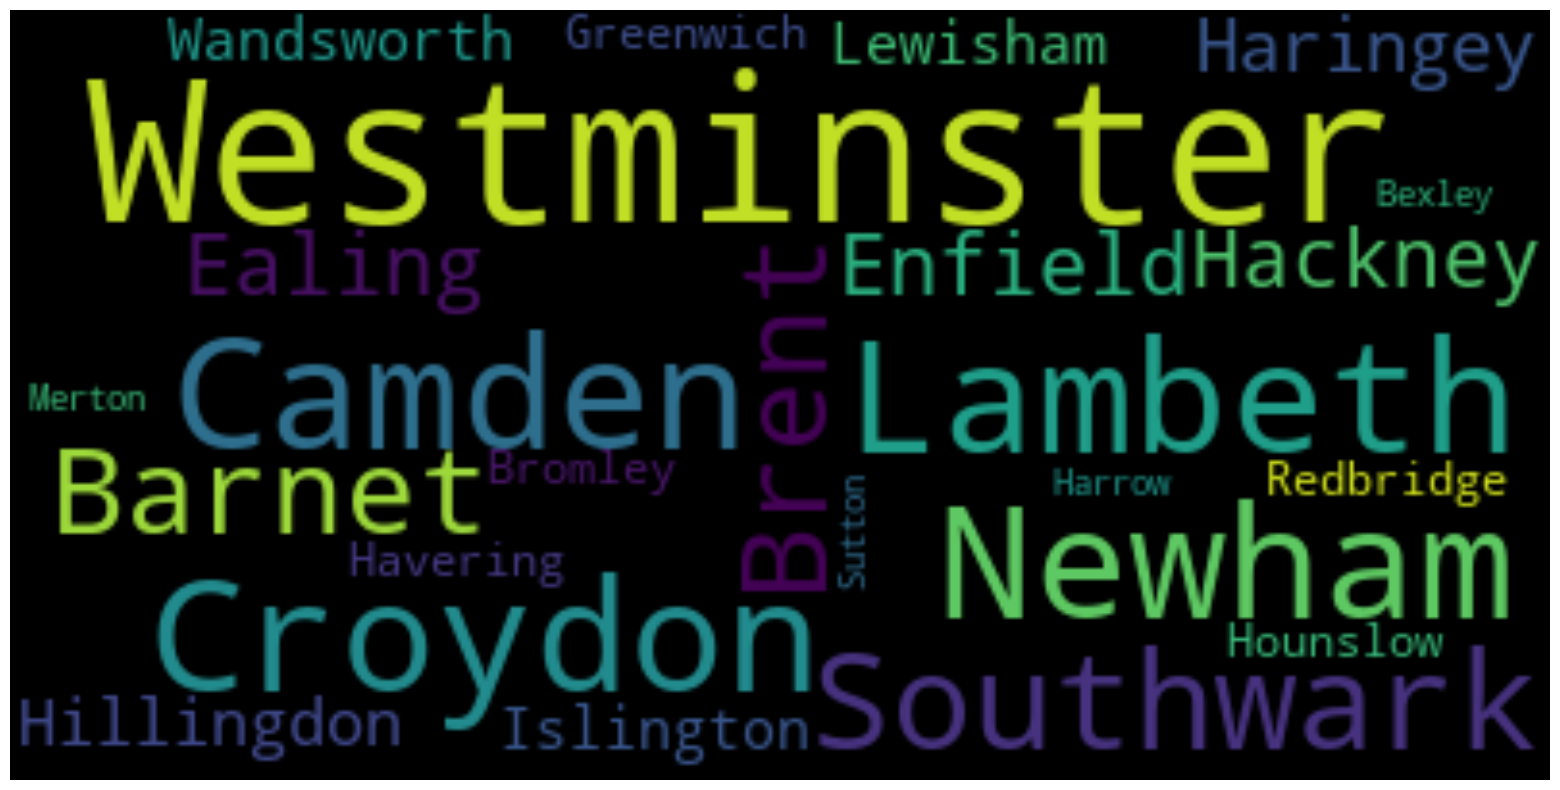

In [28]:
# menampilkan
fig = plt.figure()
fig.set_figwidth(20)
fig.set_figheight(10)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## LONDON MAP

In [64]:
# define the world map centered around Semarang with a low zoom level
world_map = folium.Map(location=[51.50204258555277, -0.14181089910643352], zoom_start=8)

# display world map
world_map